# Practice Session 06: Visualization

NetowrkX is a good library for data analysis, but its visualization capabilities are quite limited. In this unit we'll learn to incorporate information to the graphs and some other graphsd that can be adapted to represent the information that the network includes.

Identification information

**Author:** Jose Giner

**Date:** 14/03/2022

## 1. NetworkX visualization

### 1.1 layouts

Let's examine the basics of networkx graph visualization. We have available three layouts
- circular
- spring
- spectral

To see the differences among them, generate a watts-strogatz network and plot them using these layouts. Sugerence: use a subplot.

Variations
1. check the effect of `plt.axis('square')`
2. use the convenience functions `draw_circular()`...

In [1]:
# your code here
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

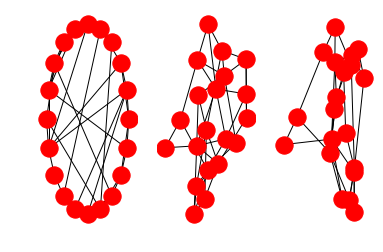

In [2]:
n = 20
num_neigbors = 4
G = nx.watts_strogatz_graph(n, num_neigbors, 0.3)

#plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
nx.draw(G, pos=nx.circular_layout(G))

plt.subplot(1, 3, 2)
nx.draw(G, pos=nx.spring_layout(G))

plt.subplot(1, 3, 3)
nx.draw(G, pos=nx.spectral_layout(G))
plt.show()


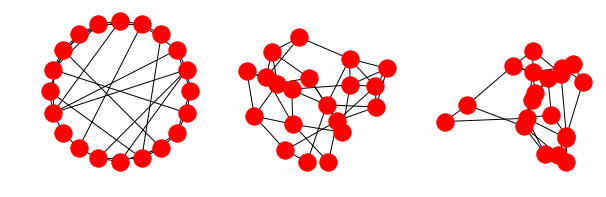

In [10]:
#your code here: square axis
plt.figure(figsize=(10,3))
plt.subplot(1, 3, 1)
nx.draw(G, pos=nx.circular_layout(G))
plt.axis('square')


plt.subplot(1, 3, 2)
nx.draw(G, pos=nx.spring_layout(G))
plt.axis('square')


plt.subplot(1, 3, 3)
nx.draw(G, pos=nx.spectral_layout(G))
plt.axis('square')
plt.show()

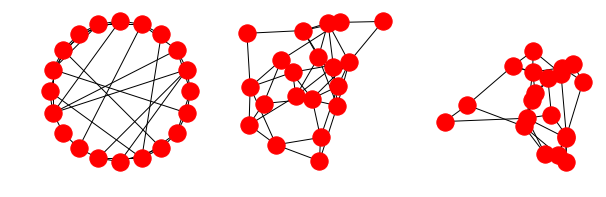

In [9]:
#your code here: functions
plt.figure(figsize=(10,3))
plt.subplot(1, 3, 1)
nx.draw_circular(G)
plt.axis('square')


plt.subplot(1, 3, 2)
nx.draw_spring(G)
plt.axis('square')


plt.subplot(1, 3, 3)
nx.draw_spectral(G)
plt.axis('square')

plt.show()

The `draw_spectral()` function uses the eigenvalues to do a clusatering over the nodes. It's clearer plotting the nodes only. The `dim` argument indicates the number of eigenvalues (dimension) to use. By default, `dim=2`, so it uses $\lambda_1$ and $\lambda_2$ in axis $x$ and $y$ as cluster separators

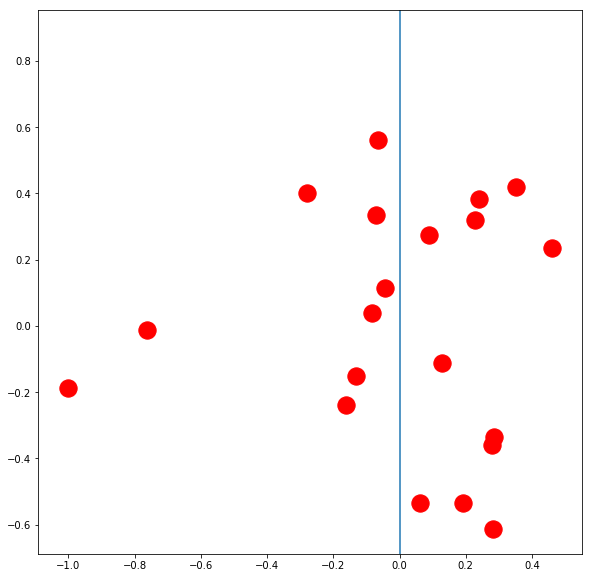

In [11]:
e = nx.laplacian_spectrum(G)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos = nx.spectral_layout(G))
plt.axis('square')
plt.axvline(x=e[0], ymin=0, ymax=1)
plt.axhline(y=e[1], xmin=0, xmax=1)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()


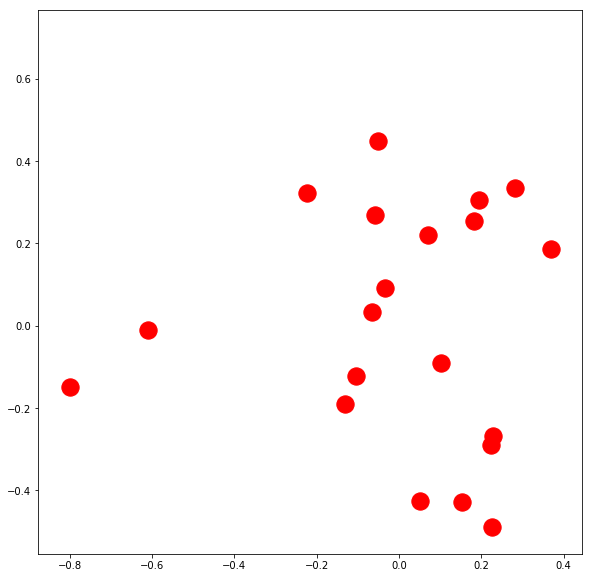

In [12]:
options = {"dim": 3}
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos = nx.spectral_layout(G, **options))
plt.axis('square')
plt.show()

To show it in a 3D plot you can use plotly. You can see and example in https://plotly.com/python/v3/3d-network-graph/

### 1.2 Nodes

In session 2 you've learned to calculate the centrality measures and use its value as a grayscale for the nodes. We can represent more than one measure at the same time by using different parameters. 

Create a random barabasi-albert network, plot it, and show
1. degree as node size `node_size`
2. choose two other centrality measures and represent as 
    - background color of the node `node_color`
    - color of the border `edgecolors` and `linewidths`
   Use an appropriate color map (see https://matplotlib.org/stable/tutorials/colors/colormaps.html) 
3. add the label of the nodes

Other parameters than frequently used shape of the node and its transparency. 

Mappings:

    Node size: Degree centrality
    Node fill color: Closeness centrality
    Node border color: Eigenvector centrality
    Border line width: Eigenvector centrality

In [277]:
def visualize_graph(G, pos, attrib1, attrib2, attrib3):
    fig, ax = plt.subplots(figsize=(15,15))
    l, m, k =[], [], []
    for n in G.nodes():
        l.append(attrib1[n])
        m.append(attrib2[n])
        k.append(attrib3[n])
    max_l=max(l)
    min_l=min(l)
    
    max_m=max(m)
    min_m=min(m)
    
    max_k=max(k)
    min_k=min(k)
    
    nx.draw_networkx_edges(G, pos)
    
    for n in G.nodes():
        size = (((attrib1[n]-min_l)/(max_l-min_l)) * 1000) + 40
        color = (attrib2[n]-min_m)/(max_m-min_m)
        edge_col = (attrib3[n]-min_k)/(max_k-min_k)
        width = ((attrib3[n]-min_k)/(max_k-min_k)) * 4
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = size, 
                               node_color = (1,1,color),edgecolors= (edge_col,0,0), linewidths = width)
    
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')
    ax.set_facecolor('skyblue')
    ax.axis('off')
    fig.set_facecolor('skyblue')
    plt.show()

In [278]:
G = nx.barabasi_albert_graph(n=100, m=2)
pos = nx.spring_layout(G)

deg = {}
for n in G.nodes():
    deg[n] = G.degree[n]


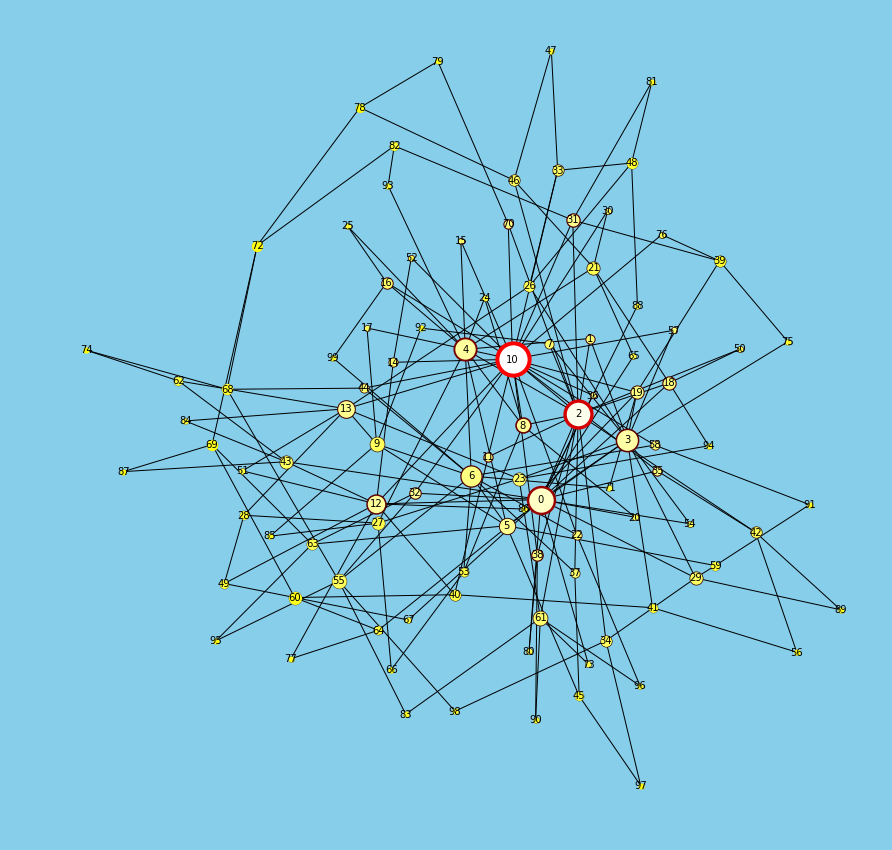

In [279]:
def node_distance(G,root_node):
    d = 0
    distances = {root_node : d}


    # Create and inicialise a queue
    cola = [(root_node,d)]

    # Iterate to add neighbor nodes with incremental distance from A to the queue
    while len(cola) != 0:
        node,di = cola[0]
        for neigh in G.neighbors(node):
            if neigh not in distances.keys():
                cola.append((neigh,di+1))
                distances[neigh] = di+1

        cola.remove((node,di))

    
    del distances[root_node]
    return distances


closeness = {}
for n in G.nodes():
    dic = node_distance(G,n)
    
# Compute closeness centrality. You will need to call node_distance(G,root_node)
    avg_len = sum(d for d in dic.values())/len(dic)
    closeness[n] = 1/avg_len


# Compute eigenvector centrality

eig_centrality = nx.eigenvector_centrality_numpy(G)
    
    
# Call to graph visualization
visualize_graph(G, pos, deg, closeness, eig_centrality)

### 1.3 Edges

In the same way, you can personalize the aspect of the edges. The only attribute for edges is their weights. Usually we represent it
- displaying the label
- changing the `width` of the line

To improve the general aspect of the graph, you can also change
- the transparency of the edge
- convert them to arcs with `connectionstyle='arc3,rad=0.2'`

Try these characteristics in a random graph (choose the distribution)

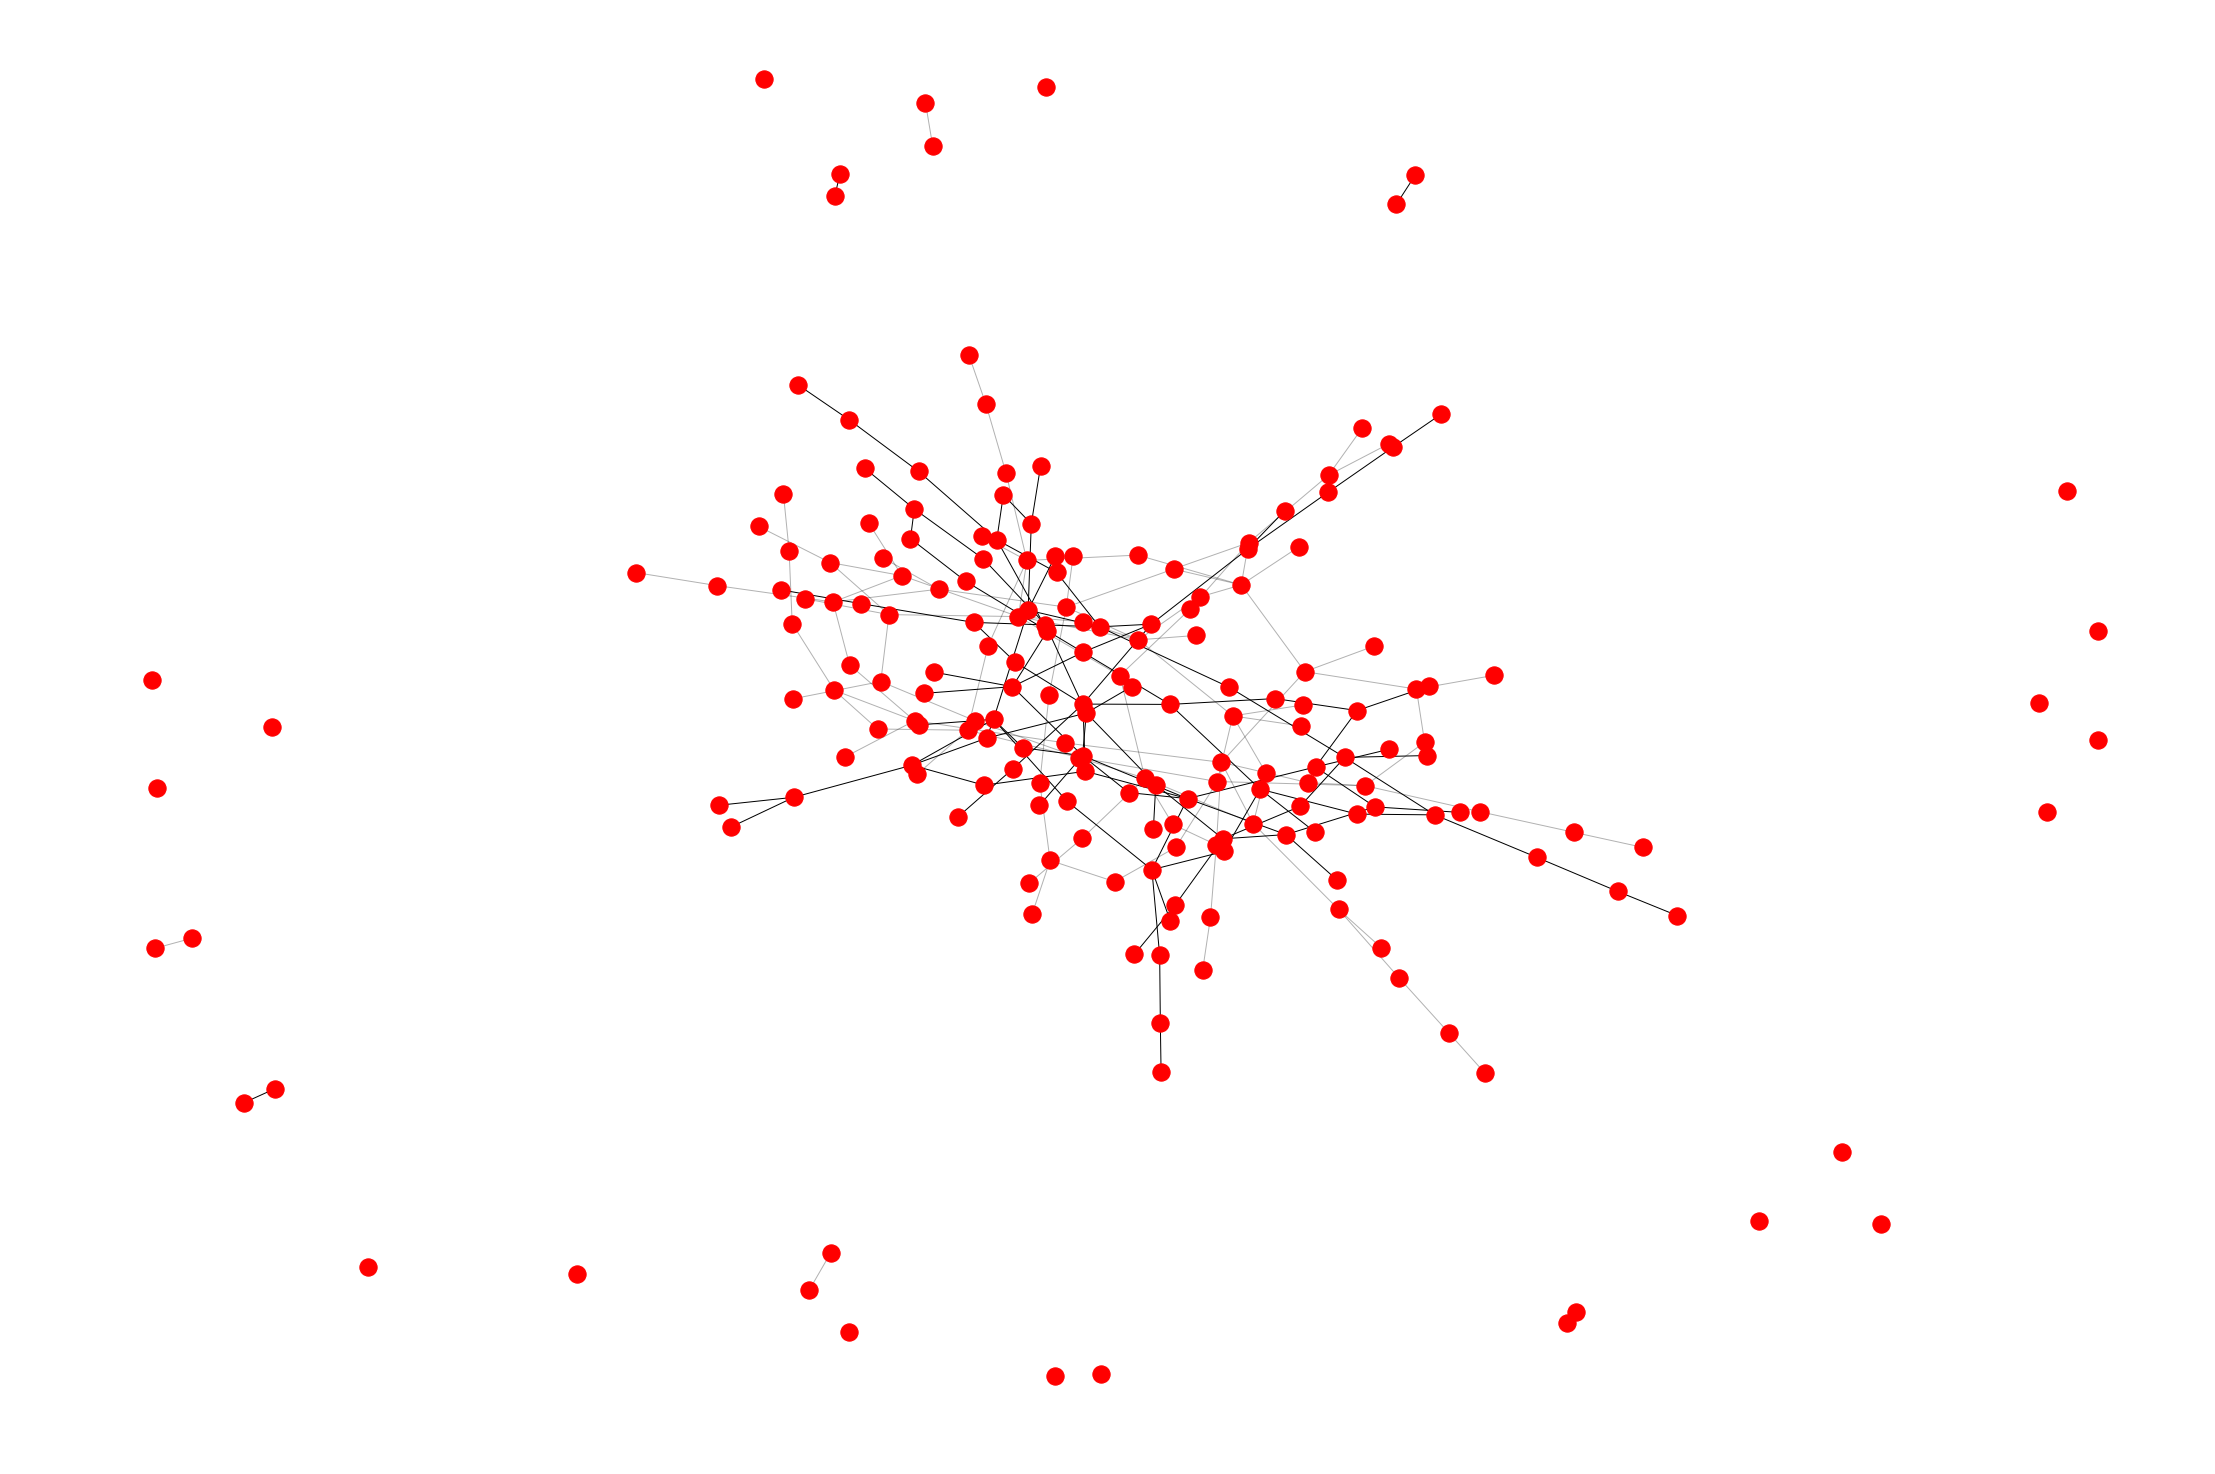

In [280]:
#your code here
G = nx.gnp_random_graph(100, 0.02)
plt.axes([0.1,0.1,5,5])
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.3, connectionstyle='arc3,rad=0.2')
    
nx.draw(G)

## 2. Other visualizations

### 2.1 Spy plot

The spy plot show the non-zero elements of adjacency matrix. Gives a quick view of its density and helps to identify the presence of patterns.



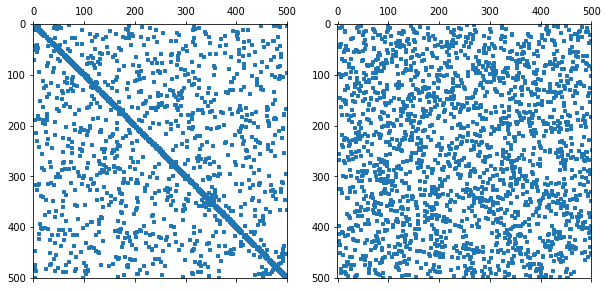

In [2]:
n = 500
num_neigbors = 4
G1 = nx.watts_strogatz_graph(n, num_neigbors, 0.5)
G2 = nx.watts_strogatz_graph(n, num_neigbors, 1)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.spy(nx.adjacency_matrix(G1), markersize=3)
plt.subplot(1,2,2)
plt.spy(nx.adjacency_matrix(G2), markersize=3)
plt.show()

### 2.2 Heatmap

The next dataset we'll use contains the relationships in the Slovenian parliament during 1994. OPen the file `Stranke94.net' (pajek format)` The annotated headmap is similar to the spy, but represents with a gradient the strenght of therelation between each pair of nodes. It's relevant for weighted networks.

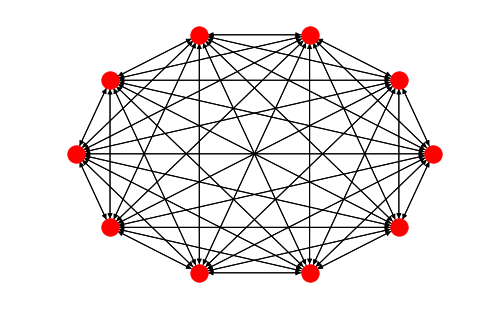

In [7]:
G = nx.read_pajek('data/Stranke94.net')
# G now contains the network
nx.draw_circular(G)

In this case, the graph is complete and the relations can be positive or negative. Can you...
1. use different colors for the edge depending on the sign?
2. add the labels of the political parties

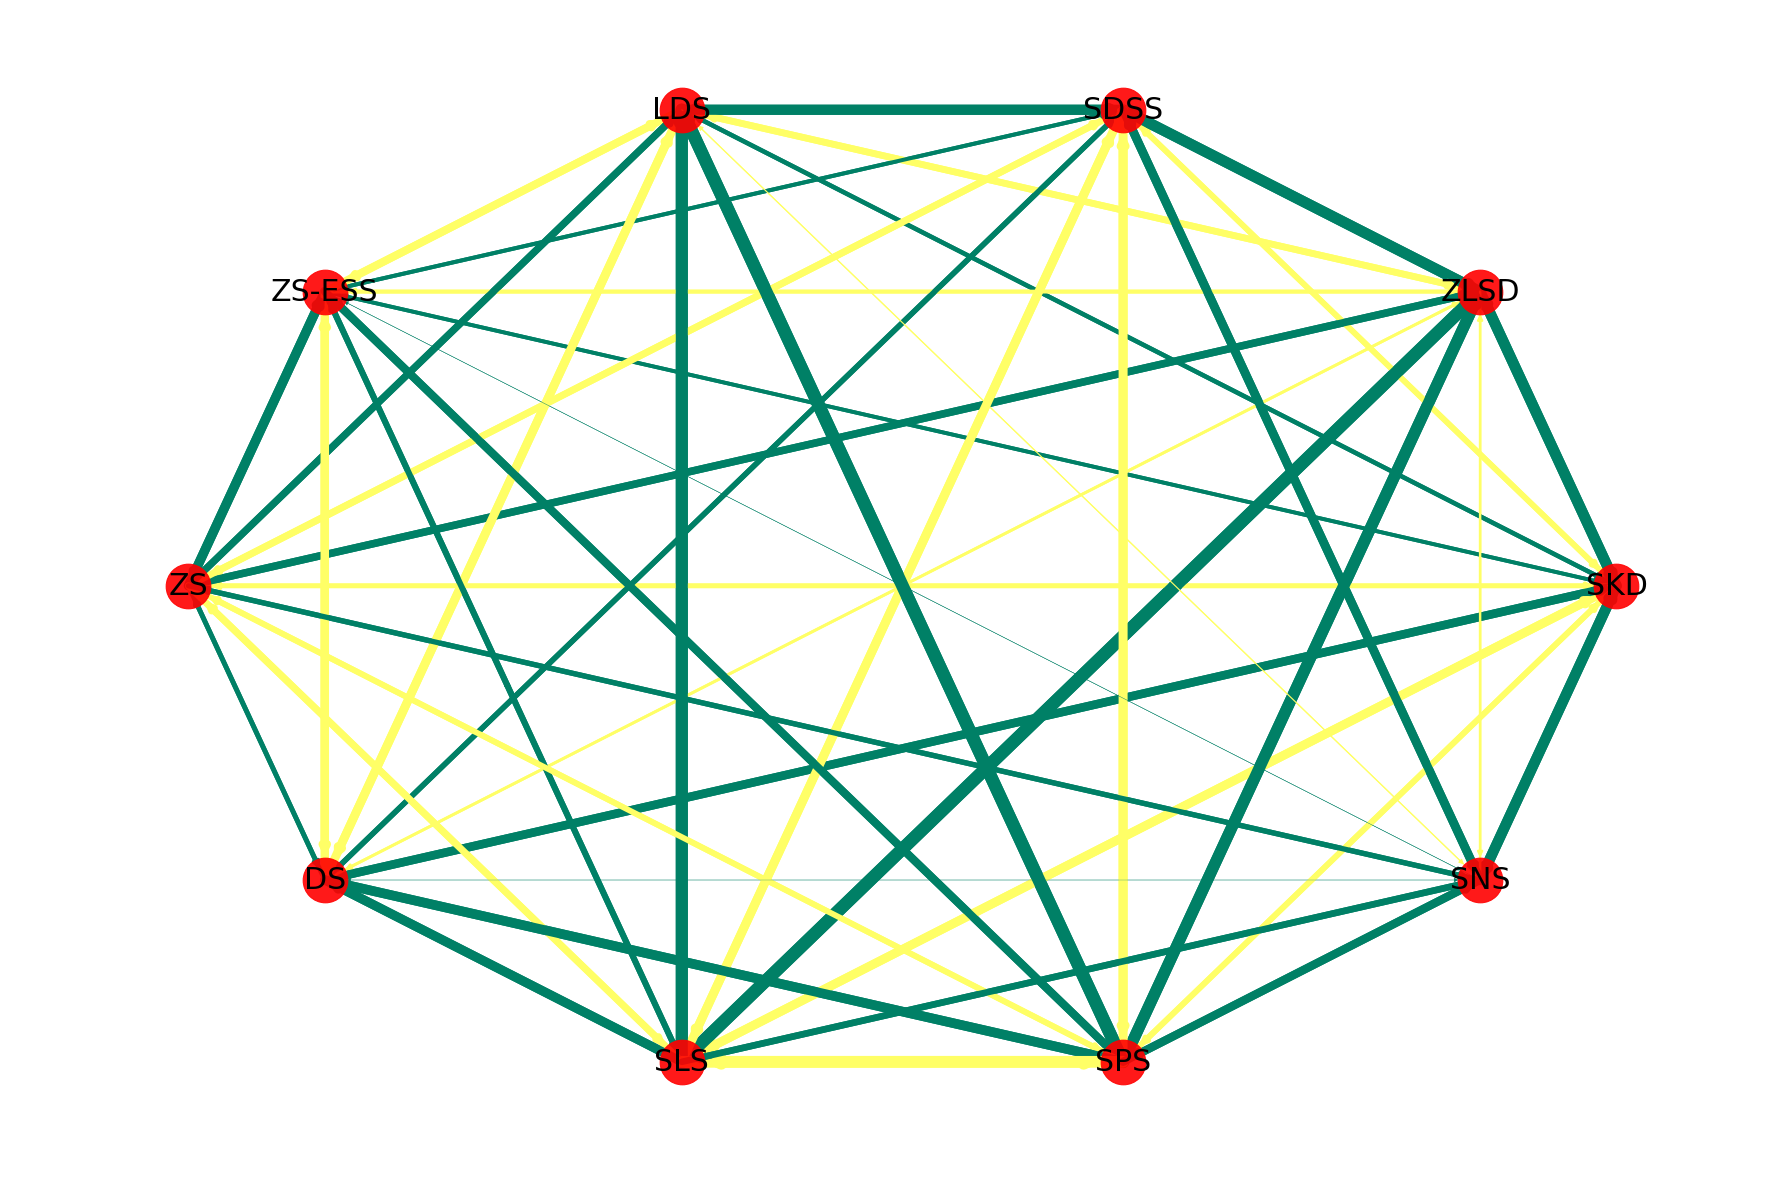

In [70]:
#your code
pos = nx.circular_layout(G)
edges = G.edges()

weights = [G[u][v]['weight'] for u,v in edges]
lw = [(G[u][v]['weight']/100) * 5 for u,v in edges]
signs = [0 if w < 0 else 1 for w in weights ]

node_opts = {"node_size" : 2000, "alpha": 0.9}
edge_opts = {"edge_color": signs, "edge_cmap" : plt.cm.summer, "width": lw}
plt.axes([0.1,0.1,4,4])
nx.draw(G,pos,**node_opts, **edge_opts)
nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')
plt.show()

The annotated heatmap in this case represents the strength and the common criteria between political parties. Show the name of the party in the axis, the value of the relation and apply a valid colormap. Follow the instructions available in https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

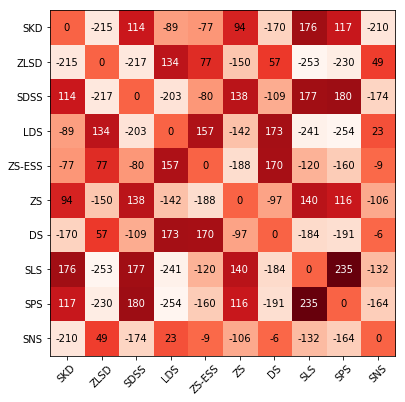

In [111]:
#your code: complete
mat = nx.adjacency_matrix(G)
n = G.nodes()
plt.axes([0,0,1.2,1.2])
plt.xticks(np.arange(len(n)), n, rotation=45)
plt.yticks(np.arange(len(n)), n)

for i in range(len(n)):
    for j in range(len(n)):
        w = mat[i,j]
        c = 'black'
        if w > 100:
            c = 'w'
        text = plt.text(j, i, w, ha="center", va="center", color=c)
plt.imshow(mat.toarray(), interpolation = 'nearest',cmap = plt.cm.Reds)

### Spatial networks. Maps

Sometimes, nodes have associated geolocation. In this case, their position corresponds to a point in the space (2D or 3D if it includes altitude). As many networkx funcions include a `pos` parameter, we can indicate easily this information to the graph.

There exists the equivalent to a random network but for spatial data. It is known as Random Geometric Graph (RGG). Nodes are randomly located in an square of side one. Two nodes link if they are closer than a radius $r$ that is a parameter of the RGG. Networkx includes a function to generate such a type of network, or we can generate points at random location.

radius = 0.18160975180197303


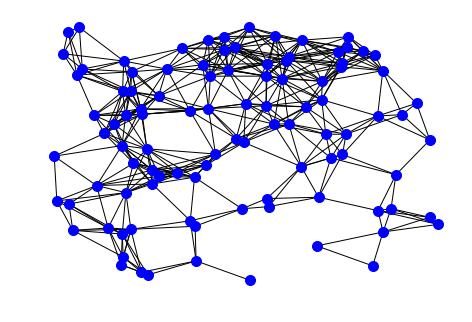

In [4]:
n = 100
# radius to generate near connected graphs
r = np.sqrt(np.log(n) / (np.pi * n)) * 1.5
print(f"radius = {r}")

G = nx.random_geometric_graph(n, r)
latlon = nx.get_node_attributes(G,'pos')
nx.draw(G, pos=latlon,
        node_color='b', node_size=100)

Text(0.5,0,'Grados')

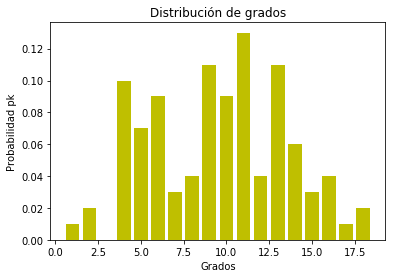

In [5]:
#your code
import collections

sucesion_grados = sorted([d for n, d in G.degree()], reverse=False)  
n=len(G)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    

    
plt.bar(grados, probabilidad, width=0.80, color='y')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")

Given a serie of points of interest (PoI), we can define the area of all the points that are closer to each one of these points. This teselation of the space and the corresponding polygons generated is a Voronoi's diagram 

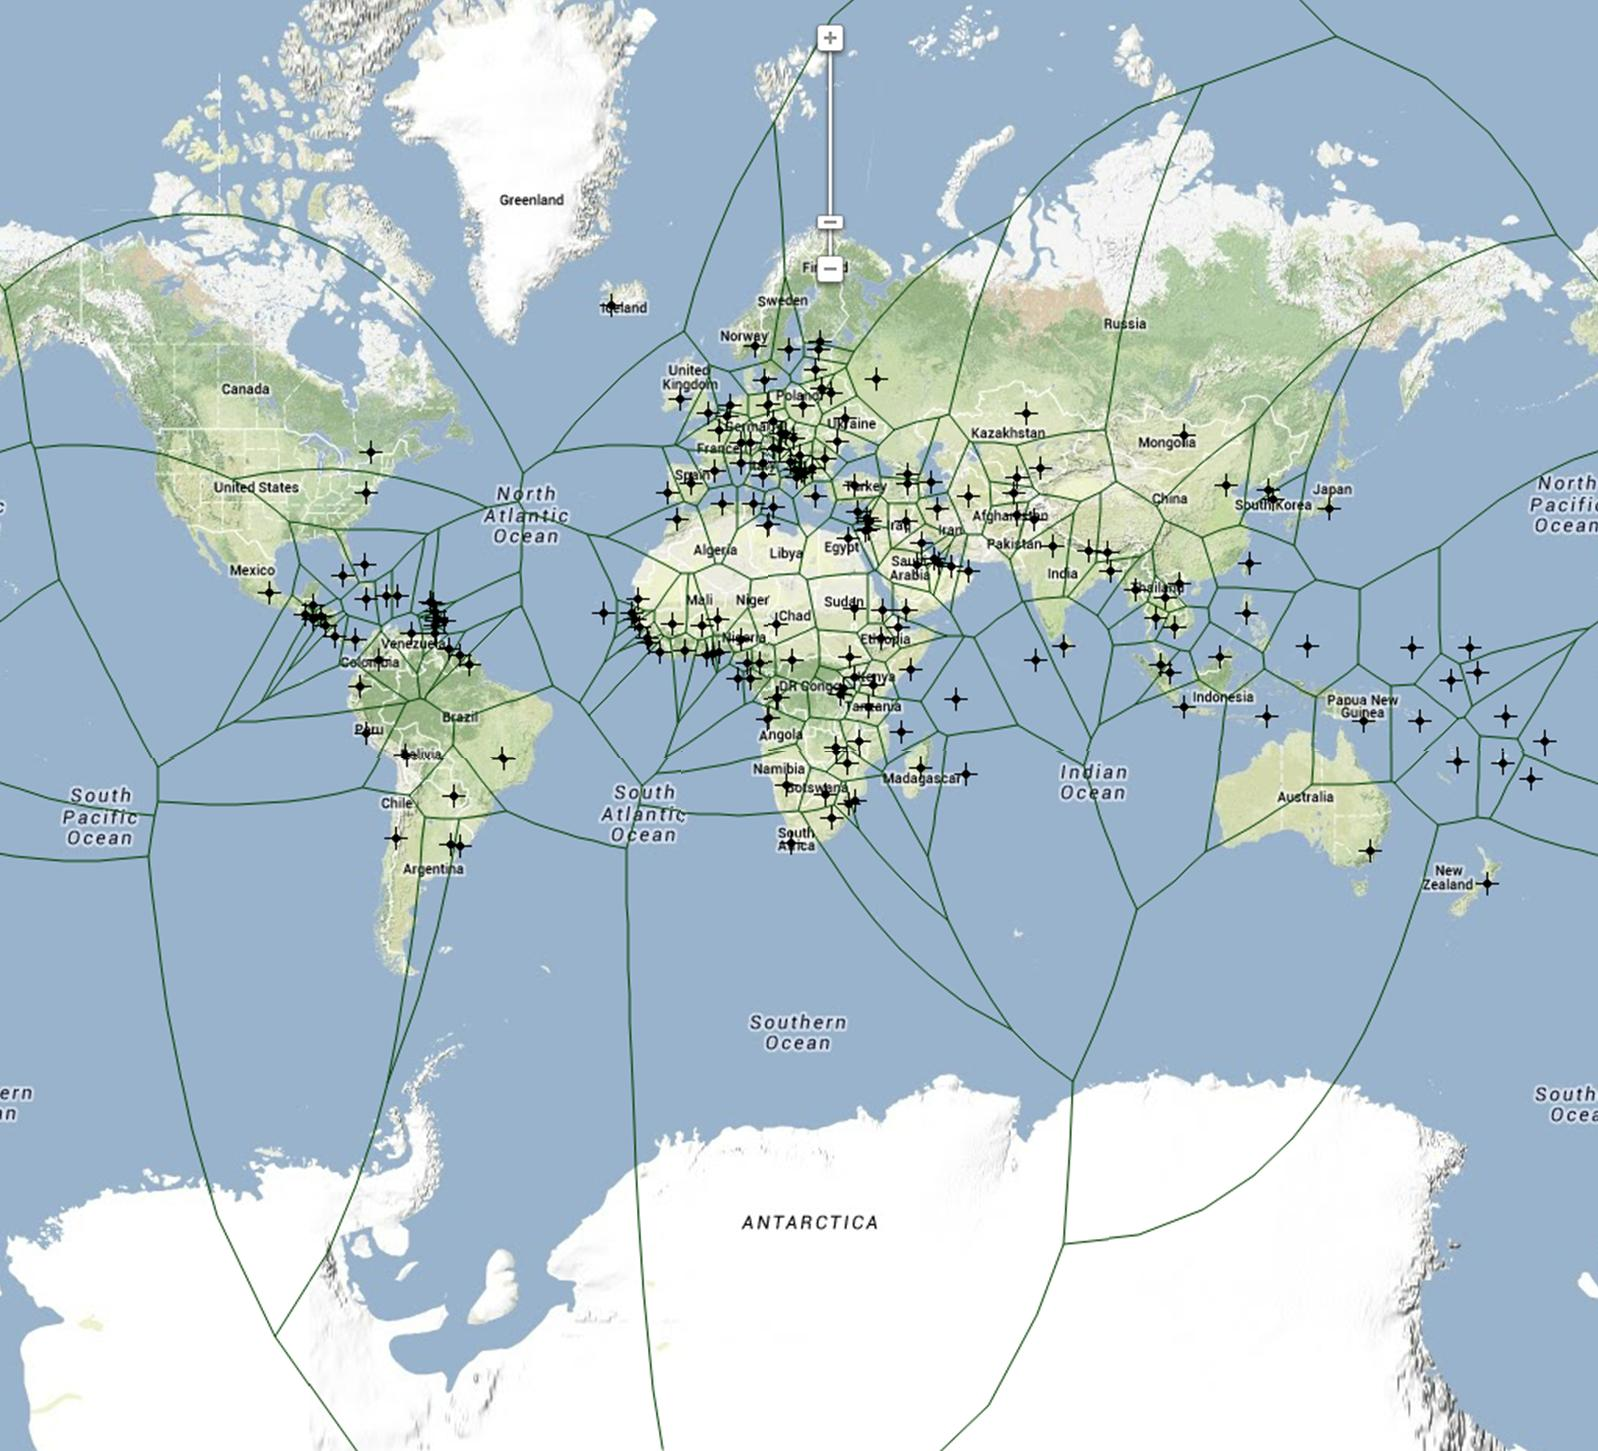

If we connect the points that share one of the sides of the polygon, we obtain a network that is the dual of a Voronoi's diagram. The network obtained with this procedure is the Delaunay's triangulation

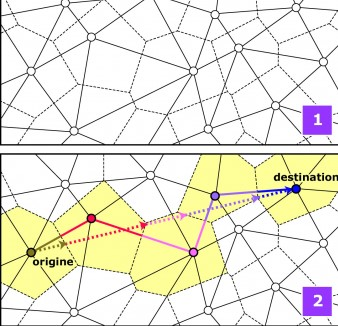

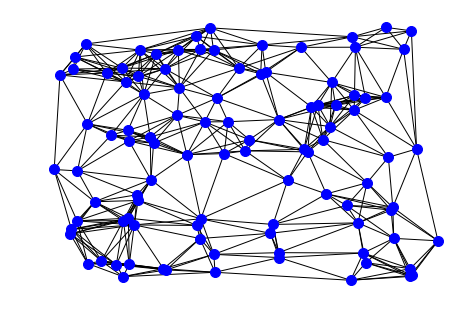

In [171]:
import scipy.spatial

def delaunay_graph(n, r):
  G = nx.random_geometric_graph(n, r)
  latlon = nx.get_node_attributes(G,'pos')
  delTri = scipy.spatial.Delaunay(list(latlon.values()))
  for path in delTri.simplices:
    nx.add_path(G, path)
  return G

G = delaunay_graph(n, r)
latlon = nx.get_node_attributes(G,'pos')
nx.draw(G, pos=latlon,
        node_color='b', node_size=100)


How is the degree distribution of these spatial networks? Plot it

Text(0.5,0,'Grados')

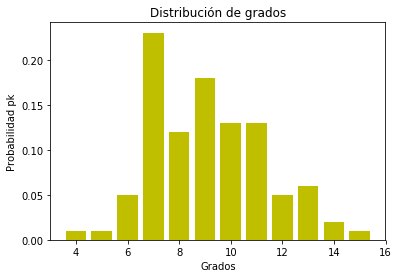

In [172]:
#your code

sucesion_grados = sorted([d for n, d in G.degree()], reverse=False)  
n=len(G)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    

    
plt.bar(grados, probabilidad, width=0.80, color='y')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")



There are more types of graphics that are interesting and visually attractive to explain information about the networks. You can find some of them in the [Python Graph Gallery](https://python-graph-gallery.com/), such as the Chord, Sankey or Arc plots. They present different ways to show information about network conenctions. Nevertheless, some of them are not natives of the habitual libraries or they incorporates just one of them.

## 3. Deliverable

### 3.1 INE data mobility

The Spanish National Institute of Statistics (INE) carried out an study to determine the commuting movility patterns of the citizens. They use the information provided by telecommunication companies. With this information, they elaborate a set of tables with daily trips between cities. You can read the information about the [Studies on mobility based on mobile phone] 8https://www.ine.es/en/experimental/movilidad/experimental_em_en.htm)

Using the data available in the INE folder, 
1. create a network using the origen-destination file, aggregated by province and by CCAA (two networks)
2. plot the graph with the mobility between provinces (adjust the properties to give the maximum amount of information)
3. characterize the degree distribution
4. generate at least one heatmap (for provinces or CCAA)
5. (optional) use the spectral layout to do clustering analysis.



In [2]:
#your code
df = pd.read_excel('C:\\Users\\Jose Giner\\OneDrive\\Escritorio\\SNA\\session-6\\data\\ine\\Tabla 1.3 Movilidad Cotidiana-Flujos Origen-Destino +15 personas.xlsx')
df.head()

Comunidad Autónoma de residencia Provincia de residencia  \
0             Comunitat Valenciana        Alicante/Alacant   
1             Comunitat Valenciana        Alicante/Alacant   
2             Comunitat Valenciana        Alicante/Alacant   
3             Comunitat Valenciana        Alicante/Alacant   
4             Comunitat Valenciana        Alicante/Alacant   

  Código área de residencia  Nombre área de residencia  \
0                      001A  Montesinos, Los y Algorfa   
1                      001A  Montesinos, Los y Algorfa   
2                      001A  Montesinos, Los y Algorfa   
3                      001A  Montesinos, Los y Algorfa   
4                      001A  Montesinos, Los y Algorfa   

  Comunidad Autónoma de destino Provincia de destino Código área de destino  \
0          Comunitat Valenciana     Alicante/Alacant                   001A   
1          Comunitat Valenciana     Alicante/Alacant                   002A   
2          Comunitat Valenciana     Alicante/Alacant                   023A   
3          Comunitat Valenciana     Alicante/Alacant                   041A   
4          Comunitat Valenciana     Alicante/Alacant                   058A   

                     Nombre área de destino  \
0                 Montesinos, Los y Algorfa   
1  Formentera del Segura y otros municipios   
2                                  Almoradí   
3                      Guardamar del Segura   
4                                   Rojales   

   Flujo origen-destino (nº de personas)  
0                                   2218  
1                                    107  
2                                    463  
3                                     29  
4                                    983

Red de mobilidad agregada por CCAA

In [3]:
df_ccaa = df.groupby(['Comunidad Autónoma de residencia', 'Comunidad Autónoma de destino'])['Flujo origen-destino (nº de personas)'].sum().reset_index()

df_ccaa = df_ccaa.drop(df_ccaa[df_ccaa['Comunidad Autónoma de residencia'] == df_ccaa['Comunidad Autónoma de destino']].index) 

df_ccaa.head(20)

Comunidad Autónoma de residencia Comunidad Autónoma de destino  \
1                         Andalucía          Castilla - La Mancha   
2                         Andalucía                         Ceuta   
3                         Andalucía                   Extremadura   
4                         Andalucía                       Galicia   
5                         Andalucía          Madrid, Comunidad de   
6                         Andalucía             Murcia, Región de   
7                         Andalucía                    País Vasco   
9                            Aragón          Castilla - La Mancha   
10                           Aragón               Castilla y León   
11                           Aragón                      Cataluña   
12                           Aragón          Comunitat Valenciana   
13                           Aragón   Navarra, Comunidad Foral de   
14                           Aragón                     Rioja, La   
16          Asturias, Principado de                     Cantabria   
17          Asturias, Principado de               Castilla y León   
18          Asturias, Principado de                       Galicia   
19                   Balears, Illes                     Andalucía   
21                   Balears, Illes                      Cataluña   
22                   Balears, Illes          Comunitat Valenciana   
24                        Cantabria       Asturias, Principado de   

    Flujo origen-destino (nº de personas)  
1                                     828  
2                                      44  
3                                     894  
4                                      25  
5                                     139  
6                                    1802  
7                                      57  
9                                     116  
10                                    281  
11                                   1706  
12                                    303  
13                                   1785  
14                                    200  
16                                    271  
17                                    342  
18                                   1128  
19                                     41  
21                                    135  
22                                     27  
24                                    546

In [4]:
mov = {} 
for i, row in df_ccaa.iterrows():
    origen = row['Comunidad Autónoma de residencia']
    destino = row['Comunidad Autónoma de destino']
    despl = row['Flujo origen-destino (nº de personas)']
    k = tuple(sorted([origen,destino]))
    if k in mov.keys():
        mov[k] += despl
    else:
        mov[k] = despl

mov2 = {}
c = 0
for k,v in mov.items():
    origen, destino = k
    mov2[c] = [origen,destino,v]
    c += 1


In [5]:
df_ccaa = pd.DataFrame.from_dict(mov2, orient='index', columns=['Origen', 'Destino', 'Flujo'])

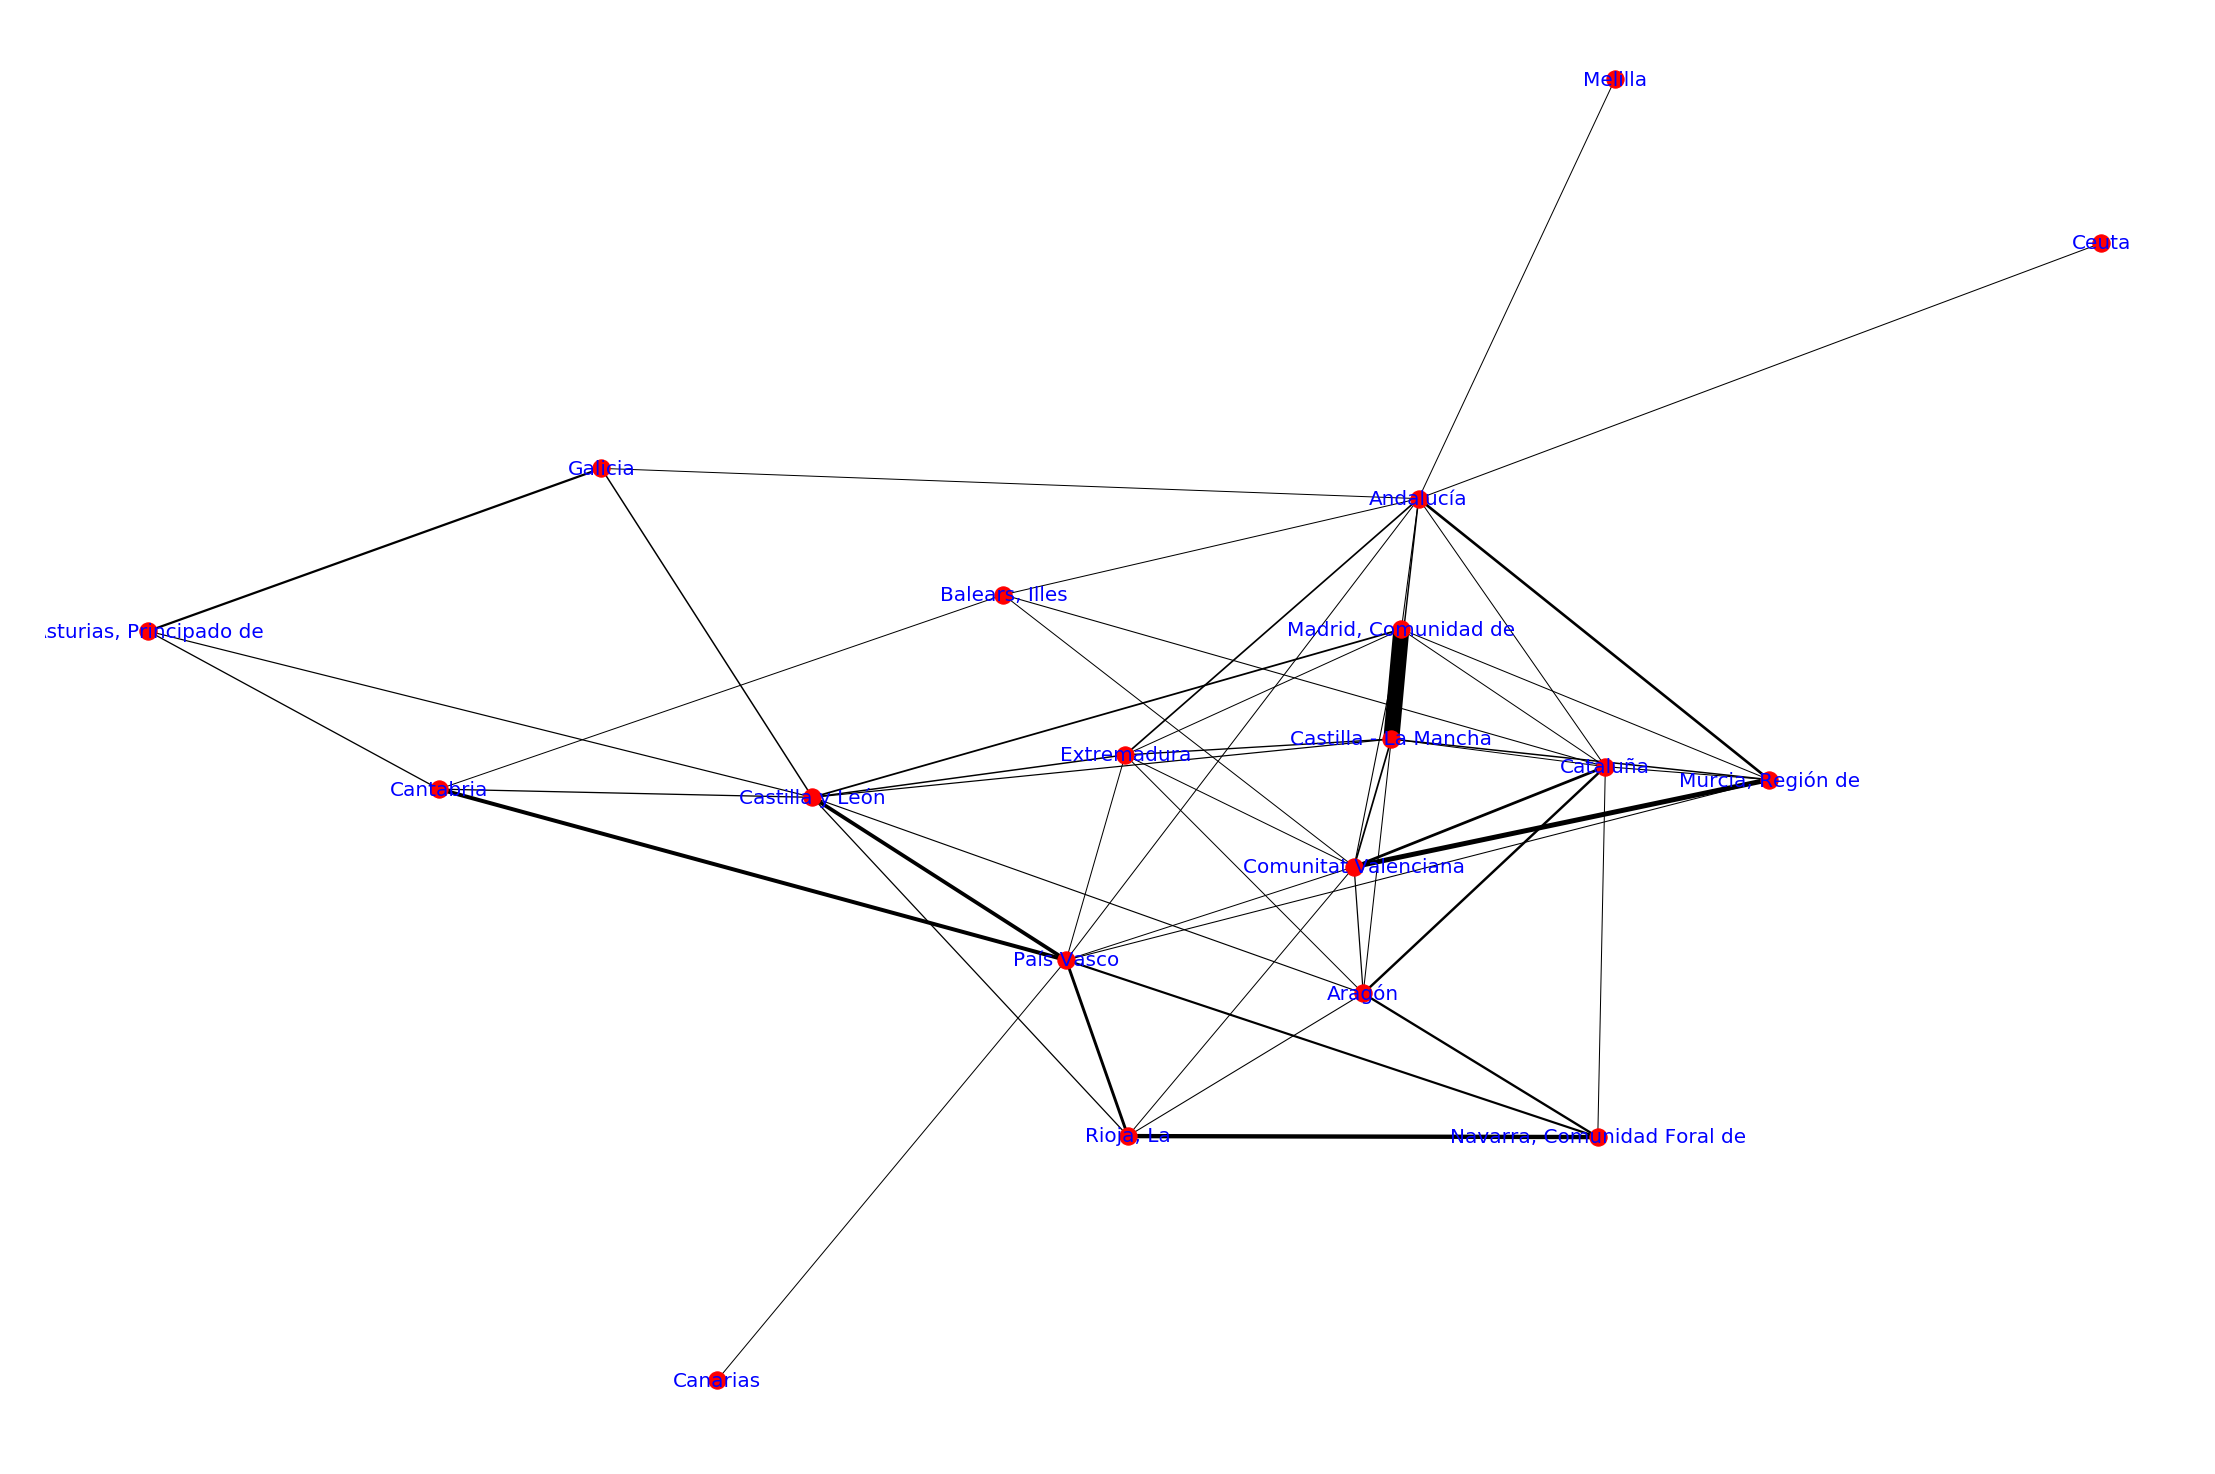

In [10]:
G_ccaa=nx.from_pandas_edgelist(df_ccaa, 'Origen', 'Destino', 'Flujo')
pos = nx.spring_layout(G_ccaa)
edges = G_ccaa.edges()
min_flujo = min([G_ccaa[u][v]['Flujo'] for u,v in edges])
max_flujo = max([G_ccaa[u][v]['Flujo'] for u,v in edges])

weights = [((G_ccaa[u][v]['Flujo']-min_flujo)/(max_flujo - min_flujo) * 15) + 1 for u,v in edges]
plt.axes([0.1,0.1,5,5])
nx.draw(G_ccaa,pos,width=weights)
nx.draw_networkx_labels(G_ccaa, pos, font_size=20, font_color='b', font_family='sans-serif')
plt.show()

Red de mobilidad agregada por provincia

In [11]:
df_prov = df.groupby(['Provincia de residencia', 'Provincia de destino'])['Flujo origen-destino (nº de personas)'].sum().reset_index()
df_prov = df_prov.drop(df_prov[df_prov['Provincia de residencia'] == df_prov['Provincia de destino']].index) 
df_prov.head(20)

Provincia de residencia Provincia de destino  \
1                 Albacete     Alicante/Alacant   
2                 Albacete          Ciudad Real   
3                 Albacete               Cuenca   
4                 Albacete               Murcia   
5                 Albacete               Toledo   
6                 Albacete    Valencia/València   
7         Alicante/Alacant             Albacete   
9         Alicante/Alacant            Barcelona   
10        Alicante/Alacant               Girona   
11        Alicante/Alacant               Madrid   
12        Alicante/Alacant               Murcia   
13        Alicante/Alacant    Valencia/València   
15                 Almería              Granada   
16                 Almería                 Jaén   
17                 Almería               Murcia   
19             Araba/Álava              Bizkaia   
20             Araba/Álava               Burgos   
21             Araba/Álava             Gipuzkoa   
22             Araba/Álava               Murcia   
23             Araba/Álava              Navarra   

    Flujo origen-destino (nº de personas)  
1                                     398  
2                                     620  
3                                    1252  
4                                     745  
5                                      20  
6                                     538  
7                                     225  
9                                      16  
10                                     17  
11                                    178  
12                                   6682  
13                                   3345  
15                                   1227  
16                                     27  
17                                   1638  
19                                   3941  
20                                   1912  
21                                   1172  
22                                    103  
23                                    138

In [12]:
mov = {} 
for i, row in df_prov.iterrows():
    origen = row['Provincia de residencia']
    destino = row['Provincia de destino']
    despl = row['Flujo origen-destino (nº de personas)']
    k = tuple(sorted([origen,destino]))
    if k in mov.keys():
        mov[k] += despl
    else:
        mov[k] = despl

mov2 = {}
c = 0
for k,v in mov.items():
    origen, destino = k
    mov2[c] = [origen,destino,v]
    c += 1

In [13]:
df_prov = pd.DataFrame.from_dict(mov2, orient='index', columns=['Origen', 'Destino', 'Flujo'])

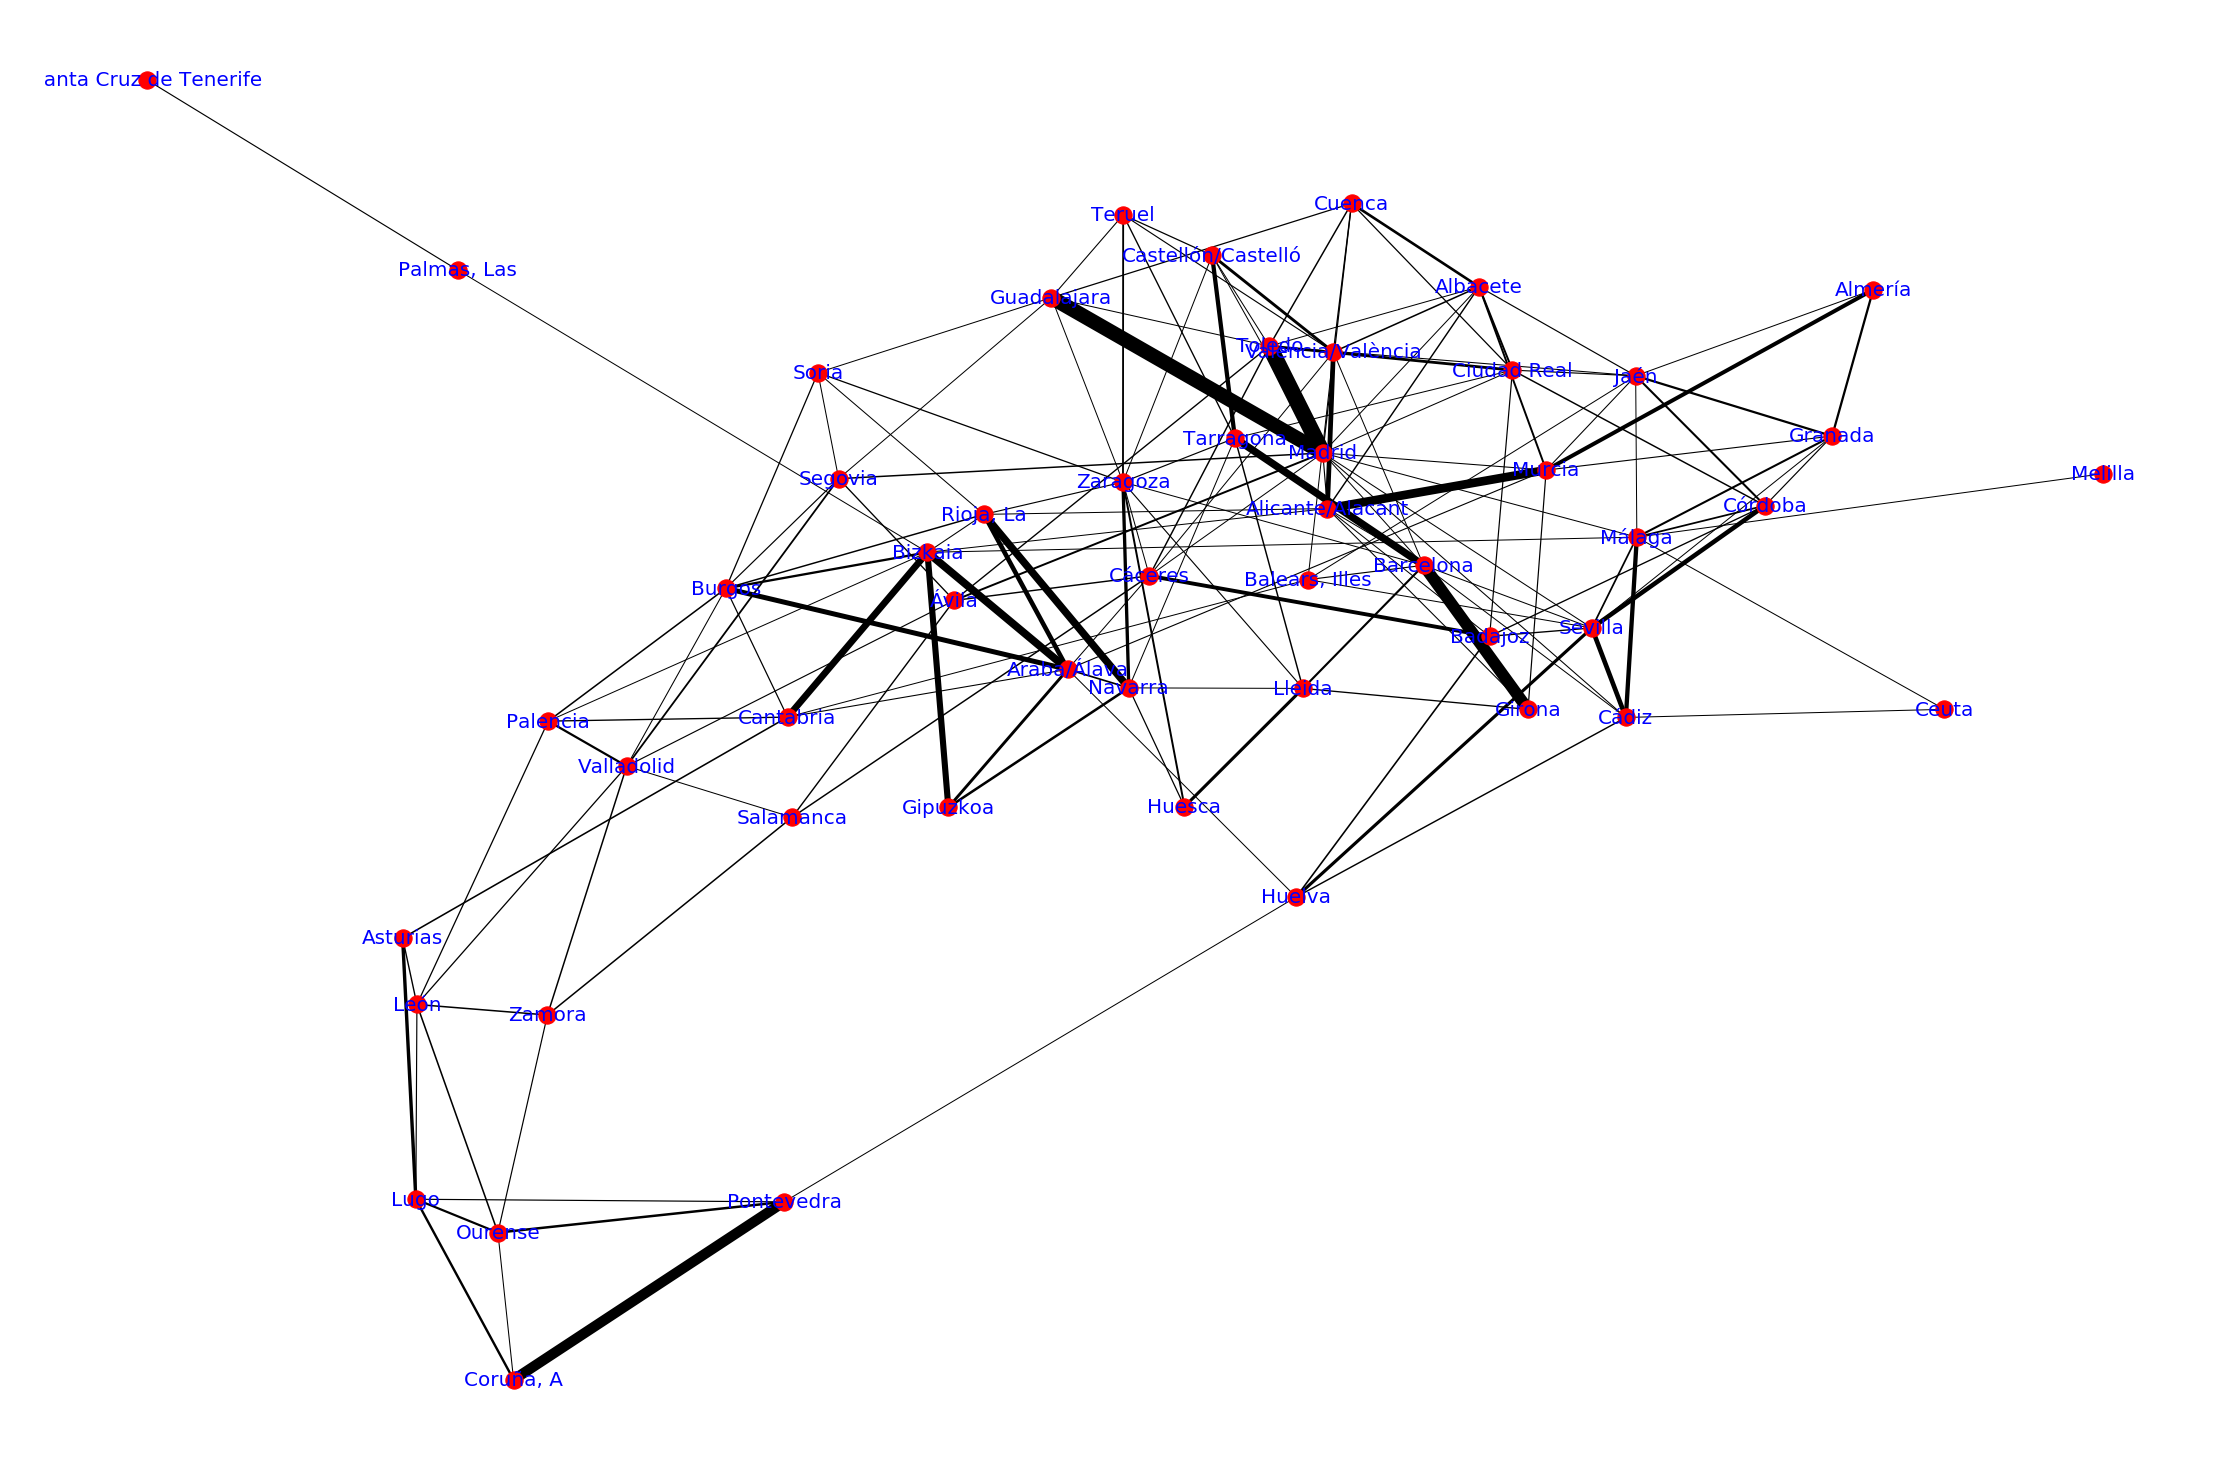

In [14]:
G_prov=nx.from_pandas_edgelist(df_prov, 'Origen', 'Destino', 'Flujo')
pos = nx.spring_layout(G_prov)
edges = G_prov.edges()

min_flujo = min([G_prov[u][v]['Flujo'] for u,v in edges])
max_flujo = max([G_prov[u][v]['Flujo'] for u,v in edges])

weights = [((G_prov[u][v]['Flujo']-min_flujo)/(max_flujo - min_flujo) * 15) + 1 for u,v in edges]
plt.axes([0.1,0.1,5,5])
nx.draw(G_prov,pos,width=weights)
nx.draw_networkx_labels(G_prov, pos, font_size=20, font_color='b', font_family='sans-serif')
plt.show()

Text(0.5,0,'Grados')

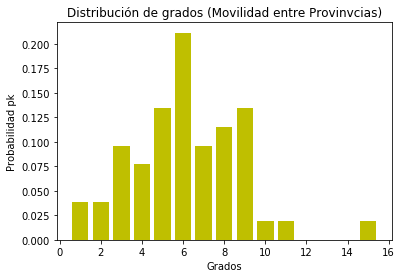

In [155]:
#your code
import collections

sucesion_grados = sorted([d for n, d in G_prov.degree()], reverse=False) 
n=len(G_prov)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())


probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    

    
plt.bar(grados, probabilidad, width=0.80, color='y')

plt.title("Distribución de grados (Movilidad entre Provinvcias)")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")


Text(0.5,0,'Grados')

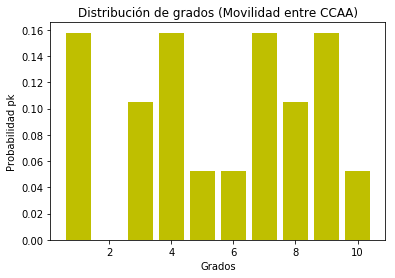

In [156]:
sucesion_grados = sorted([d for n, d in G_ccaa.degree()], reverse=False) 
n=len(G_ccaa)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())


probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    

    
plt.bar(grados, probabilidad, width=0.80, color='y')

plt.title("Distribución de grados (Movilidad entre CCAA)")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")

Mapa de calor para las provincias

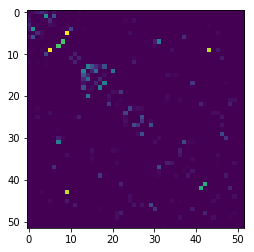

In [183]:
plt.imshow(nx.adjacency_matrix(G_prov, weight = 'Flujo').toarray())

Mapa de calor para las CCAA

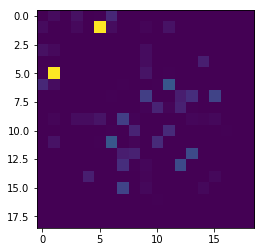

In [184]:
plt.imshow(nx.adjacency_matrix(G_ccaa, weight = 'Flujo').toarray())

Análisis de clusters por CCAA

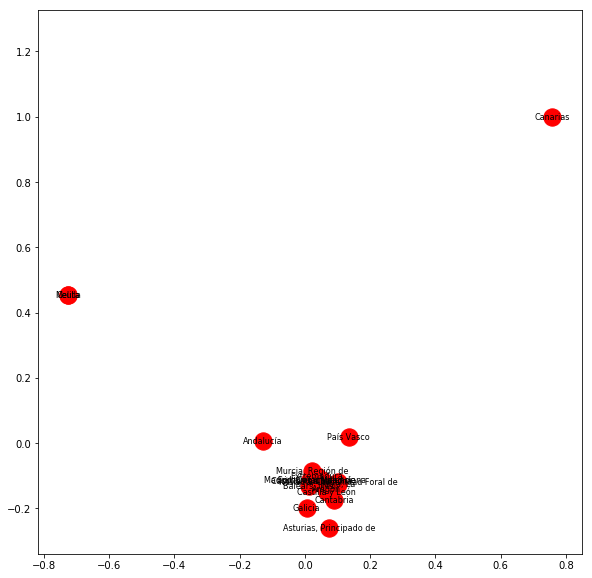

In [178]:
pos = nx.spectral_layout(G_ccaa)
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G_ccaa, pos = pos)
nx.draw_networkx_labels(G_ccaa,pos,font_size=8,font_family='sans-serif')
plt.axis('square')
plt.show()

Análisis de clusters por provincia

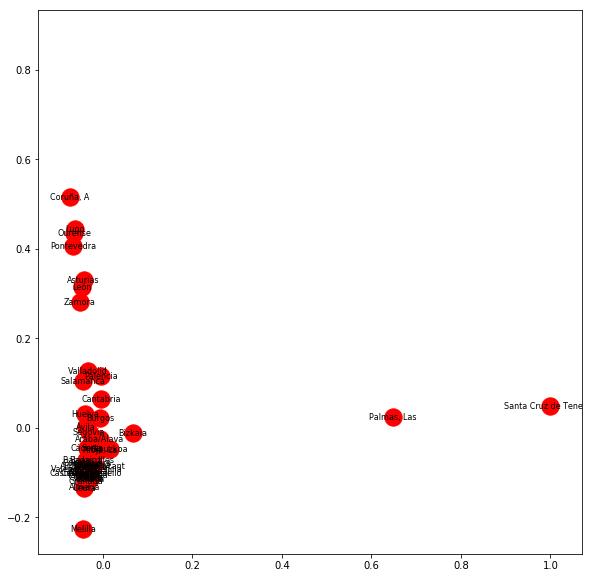

In [177]:
pos = nx.spectral_layout(G_prov)
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G_prov, pos = pos)
nx.draw_networkx_labels(G_prov,pos,font_size=8,font_family='sans-serif')
plt.axis('square')
plt.show()

###  3.2 Valenbisi network

In the Valenbisi folder you,ll find information about the stations of the bike sharing service of Valencia and the trips along a period. Use this information to
1. generate a network with the location and the total capacity of the stations
2. plot it (optional: over the map of the city)
3. analize the degree distribution and locate the most relevant stations by its centrality (closeness and betweenness)
4. (optional) simulate  the trips during one day (changes in the availability) Choose the most appropriate visualization

In [4]:
import json
data = json.load(open('C:\\Users\\Jose Giner\\OneDrive\\Escritorio\\SNA\\session-6\\data\\valenbisi\\Valenbisi.JSON', encoding = 'utf-8') )


features = data["features"]
new_data = []
for f in features:
    prop = f['properties']
    geom = f['geometry']
    prop.update(geom)
    new_data.append(prop)

    
stations_df = pd.DataFrame.from_dict(new_data)
stations_df


address available  \
0                          Plaza de la Virgen - Bailía        18   
1                                 Plaza Poeta Llorente         4   
2                Guillem de Castro - San Pedro Pascual         0   
3                  Plaza del Mercado - Taula de Canvis         9   
4                                      Plaza de Tetuán         8   
5                 Xátiva - Bailén (Estación del Norte)         8   
6                                 Juan Llorens - Quart         2   
7               Mediterráneo - Plaza Cruz de Cañamelar         0   
8                      Armada Española - Mariano Cuber        17   
9                                  Paseo Neptuno 32-34         7   
10                                 Pavía - Columbretes         1   
11                                 Cra. Malilla - Oltá        11   
12                                  Uruguay - Carteros         3   
13                                    Pechina - Teruel         3   
14                        Quart - Fernando el Católico        10   
15                      Músico Ayllón - Francisco Dolz        12   
16                Juan Llorens - Literato Gabriel Miró         1   
17               Plaza América - Cirilo Amorós - Sorní        20   
18          Cirilo Amorós - Jorge Juan (Mercado Colón)        14   
19                             Salamanca - Conde Altea        14   
20                     Conde Altea - Almirante Cadarso         6   
21                                  Germanías - Ruzafa        13   
22                    Regne de Valencia - Doctor Sumsi        10   
23               Regne de Valencia - Almirante Cadarso        12   
24                 José María de Haro - Justo y Pastor         9   
25               Rubén Darío - Plaza Fray Luis Colomer         0   
26           Albalat dels Tarongers - Paseo Facultades        19   
27                    Aularios Universidad de Valencia        18   
28                                       Luís Peixó 20         6   
29                     Pintor Stolz - Nueve de Octubre         8   
..                                                 ...       ...   
245                      Campos Crespo - Juan de Garay        12   
246                               Tres Cruces - Pio XI        10   
247  Arquitecto Segura del Lago - Camino Nuevo de P...         9   
248                        Dels Gremis - Campos Crespo        15   
249                José Meliá Castelló - Campos Crespo         5   
250                       Estación AVE Joaquín Sorolla         8   
251                  Fray Junípero Serra - Vall d'Uixó        11   
252                    Fray Juanípero Serra - Torrente        11   
253        Archiduque Carlos - José María Mortes Lerma        10   
254                         Santa Cruz de Tenerife, 21         8   
255                               Av. del Cid - Burgos        13   
256              Pintor Rafael Solves - Jose Soto Mico         0   
257                         Pio IX - Músico Cabanilles         5   
258                           Traginers - Pedrapiquers        15   
259                            Plaza Xuquer - Vinalopó         4   
260          Tres Forques - Colonia Española de Mexico        13   
261           Padre Esteban Pernet - Casa Misericordia         0   
262                              Av. del Cid - Marconi         5   
263                     Alcasser - Poeta Alberto Lista         1   
264                Canal de Navarrés - Maestro Rodrigo         2   
265                     Beniferri - Vicent Tomás Martí         1   
266                                 Plaza Luis Cano, 5        10   
267                                     Campamento, 81         1   
268                                 Ninot - Regino Mas         1   
269                  Salvador Cerveró - Carlos Cortina         7   
270            Vicente la Roda - Ingeniero Fausto Elio        10   
271                             Moraira - Alta del Mar         9   
272            San Francisco de Pau

In [144]:
stations_df.to_csv('stations.csv', sep = ';', encoding = 'latin1', index=False)

Dibujamos la red con networkx.

Tamaño de los nodos proporcional a la capacidad de la estación y color de los nodos si hay ticket (rojo si y azul no).

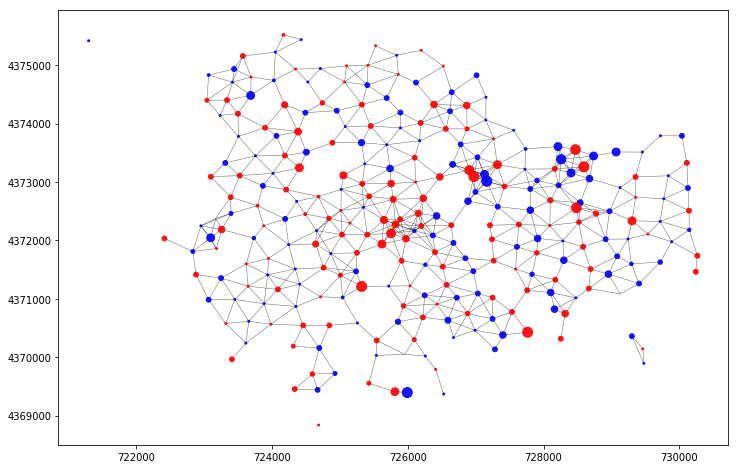

In [5]:
G = nx.Graph()
stations_df["total"] = pd.to_numeric(stations_df["total"])
stations_df['ticket']=pd.Categorical(stations_df['ticket'])
for i,row in stations_df.iterrows():
    G.add_node(row['number'], pos=row['coordinates'],capacity = row['total'])


fig, ax = plt.subplots(1, 1, figsize=(12, 8))

pos = nx.get_node_attributes(G, 'pos')
cap = nx.get_node_attributes(G, 'capacity')
max_cap = max([v for v in cap.values()])
min_cap = min([v for v in cap.values()])
weights = [(v-min_cap)/(max_cap - min_cap) * 100 for v in cap.values()]


nodes = G.nodes()


node_opts = {'node_size' : weights, 'node_color' : stations_df['ticket'].cat.codes, 
             'cmap' : plt.cm.bwr, "alpha": 0.9}
edge_opts = {"edge_color": "k", 'alpha': 0.6, 'width': 0.5}


RGG = nx.random_geometric_graph(nodes, radius=500, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
nx.draw_networkx_edges(RGG, pos=pos,ax=ax, **edge_opts)

plt.show()

Dibujamos la red sobre un mapa interactivo, utilizando la librería de [folium](https://python-visualization.github.io/folium/modules.html)

In [5]:
import folium
import re
import utm

folium_map = folium.Map()

edges = RGG.edges()
shp_id = 0
shapes = {}
for edge in edges:  
    u,v = edge
    u_coords = stations_df[stations_df['number'] == u]['coordinates'].item()
    v_coords = stations_df[stations_df['number'] == v]['coordinates'].item()
    lat_u,long_u = u_coords
    lat_v,long_v = v_coords
    u_latlong = utm.to_latlon(lat_u, long_u, 30, 'U')
    v_latlong = utm.to_latlon(lat_v, long_v, 30, 'U')
    
    
    shapes[shp_id] = [u_latlong, v_latlong]
    shp_id += 1


shapes_layer = folium.FeatureGroup(name='shapes')
for shape_id, shape_geometry in shapes.items():
    polyline = folium.PolyLine(shape_geometry, popup = shape_id, weight=3)
    
    shapes_layer.add_child(polyline)

folium_map.add_child(shapes_layer)

with open('./stations.csv','rt', encoding = 'latin1') as stations_file:
    station_records = stations_file.readlines()  #process line by line

stations = {}
for record in station_records[1:]:   
    address,_,coords,_,_,station_id,_,_,capacity = record.strip().split(';')[:9]
    coords = re.findall("\d+\.\d+", coords)
    lat, long = [float(s) for s in coords]
    stations[station_id] = [utm.to_latlon(lat, long, 30, 'U'),address,int(capacity)]


stations_layer = folium.FeatureGroup(name = 'stations')
for station_id, station_geometry in stations.items():
    coords,add,cap = station_geometry
    point = folium.CircleMarker(location=coords, radius=cap/6, popup = station_id+'\n'+add, 
                                color = 'blue', fill=True, fill_opacity=1)
    
    stations_layer.add_child(point)

folium_map.add_child(stations_layer)
folium_map.fit_bounds(stations_layer.get_bounds())



folium_map

Text(0.5,0,'Grados')

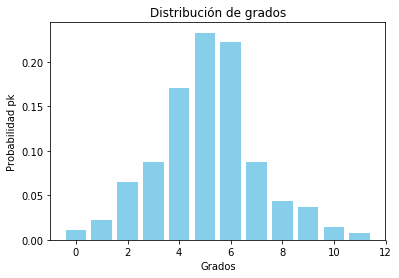

In [6]:
import collections
sucesion_grados = sorted([d for n, d in RGG.degree()], reverse=False) 
n=len(RGG)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())


probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    

    
plt.bar(grados, probabilidad, width=0.80, color='skyblue')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")


Betweenness centrality 

In [22]:
betweenness = nx.betweenness_centrality(RGG)
bet = {k: v for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse = True)}

count = 1
for k,v in bet.items():
    if count < 11:
        location = stations_df[stations_df['number'] == k]['address'].item()
        print('Ubicación en puesto {} de centralidad betweenness: {} \n{}\n'.format(str(count),location,str(v)))
        count += 1
    else:
        break

Ubicación en puesto 1 de centralidad betweenness: General Elio - Llano del Real 
0.14974294353058212

Ubicación en puesto 2 de centralidad betweenness: Blasco Ibañez - Doctor Gómez Ferrer (Clínico) 
0.13025103419897838

Ubicación en puesto 3 de centralidad betweenness: Alfambra - Poeta Monmeneu 
0.12433159379688405

Ubicación en puesto 4 de centralidad betweenness: Aragón - Ernesto Ferrer 
0.10934905264412978

Ubicación en puesto 5 de centralidad betweenness: Alameda - Pintor Monleón 
0.10913173849625035

Ubicación en puesto 6 de centralidad betweenness: Alboraya - Flora 
0.10704390600476972

Ubicación en puesto 7 de centralidad betweenness: Conde Altea - Almirante Cadarso 
0.09581559872343919

Ubicación en puesto 8 de centralidad betweenness: Colón, 60 
0.09169998110069863

Ubicación en puesto 9 de centralidad betweenness: Plaza España 
0.09117336524197918

Ubicación en puesto 10 de centralidad betweenness: Huesca - Barón de Cárcer 
0.08945563247883033



Dibujamos el grafo con el tamaño de los nodos proporcional al betweenness centrality

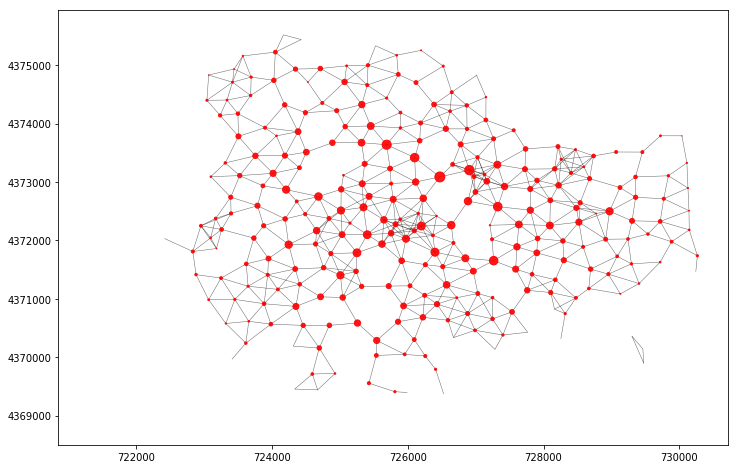

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

max_bet = max([v for v in betweenness.values()])
min_bet = min([v for v in betweenness.values()])
weights = [(v-min_bet)/(max_bet - min_bet) * 100 for v in betweenness.values()]

node_opts = {'node_size' : weights, 'node_color' : 'red', "alpha": 0.9}

nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
nx.draw_networkx_edges(RGG, pos=pos,ax=ax, **edge_opts)

plt.show()

Closeness centrality

In [19]:
closeness = nx.closeness_centrality(RGG)
close = {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse = True)}

count = 1
for k,v in close.items():
    if count < 11:
        location = stations_df[stations_df['number'] == k]['address'].item()
        print('Ubicación en puesto {} de cercanía: {} \n{}\n'.format(str(count),location,str(v)))
        count += 1
    else:
        break

Ubicación en puesto 1 de cercanía: Colón, 60 
0.15401374081158276

Ubicación en puesto 2 de cercanía: Plaza de Tetuán 
0.152048368249022

Ubicación en puesto 3 de cercanía: Colón 20-22 
0.152048368249022

Ubicación en puesto 4 de cercanía: Plaza Ayuntamiento - Cotanda 
0.15169640443363072

Ubicación en puesto 5 de cercanía: Barcas, 11 
0.15160866793598257

Ubicación en puesto 6 de cercanía: Ribera - Plaza Ayuntamiento 
0.15143349905332978

Ubicación en puesto 7 de cercanía: Pie de la Cruz - Rejas 
0.15125873448431268

Ubicación en puesto 8 de cercanía: General Elio - Llano del Real 
0.15117150338022714

Ubicación en puesto 9 de cercanía: Plaza Poeta Llorente 
0.15099734266204717

Ubicación en puesto 10 de cercanía: Huesca - Barón de Cárcer 
0.15030469430121207



Dibujamos el grafo con el tamaño de los nodos proporcional a su cercanía

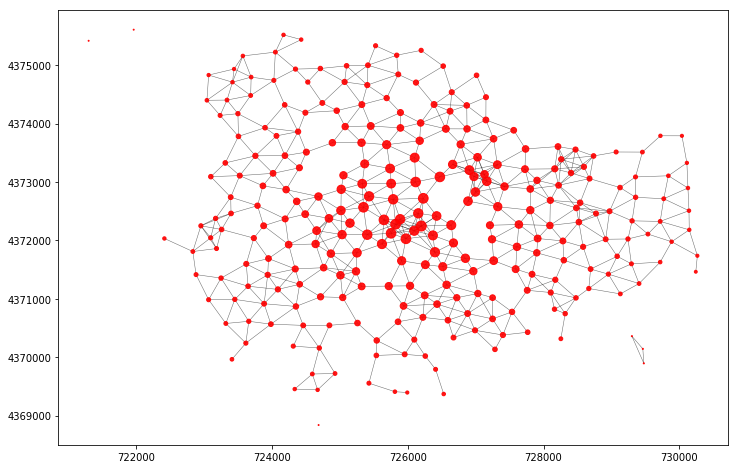

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

max_cl = max([v for v in closeness.values()])
min_cl = min([v for v in closeness.values()])

weights = [100 ** ((v-min_cl)/(max_cl - min_cl))  for v in closeness.values()]

node_opts = {'node_size' : weights, 'node_color' : 'red', "alpha": 0.9}

nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
nx.draw_networkx_edges(RGG, pos=pos,ax=ax, **edge_opts)

plt.show()